# Plotly Geo scatter plots with Dimensions data

* https://plotly.com/python/scatter-plots-on-maps/
* https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html


In [1]:
import os
import sys
import time
import json
import pandas as pd
from pandas import json_normalize
from tqdm.notebook import tqdm as progress
import plotly.express as px
from plotly.offline import plot
if not 'google.colab' in sys.modules:
  # make js dependecies local / needed by html exports 
  from plotly.offline import init_notebook_mode
  init_notebook_mode(connected=True)
#
import dimcli
from dimcli.shortcuts import *
#
dimcli.login()
dsl = dimcli.Dsl()

Dimcli - Dimensions API Client (v0.7.2)
Connected to: https://app.dimensions.ai - DSL v1.26
Method: dsl.ini file


### Testing out plotly_express with DSL data

In [6]:
res = dslquery("""search publications for "malaria" 
    where research_org_country_names="Italy" and year < 2010 
    return research_orgs[basics] limit 50""")
df = res.as_dataframe()
df = df.fillna("")
df.head(5)

Returned Research_orgs: 50


,id,count,state_name,country_name,types,linkout,longitude,latitude,name,city_name,acronym
0,grid.7841.a,399,Lazio,Italy,[Education],[http://www.uniroma1.it/],12.514438,41.903840,Sapienza University of Rome,Rome,
1,grid.416651.1,298,,Italy,[Government],[http://www.iss.it/chis/?lang=2],12.518499,41.903923,National Institute of Health,Rome,ISS
2,grid.4708.b,236,,Italy,[Education],[http://www.unimi.it/ENG/],9.194592,45.460990,University of Milan,Milan,UNIMI
3,grid.7605.4,143,Piemonte,Italy,[Education],[http://en.unito.it/],7.689019,45.066666,University of Turin,Turin,UNITO
4,grid.8404.8,141,Toscana,Italy,[Education],[http://www.unifi.it/],11.259733,43.777880,University of Florence,Florence,


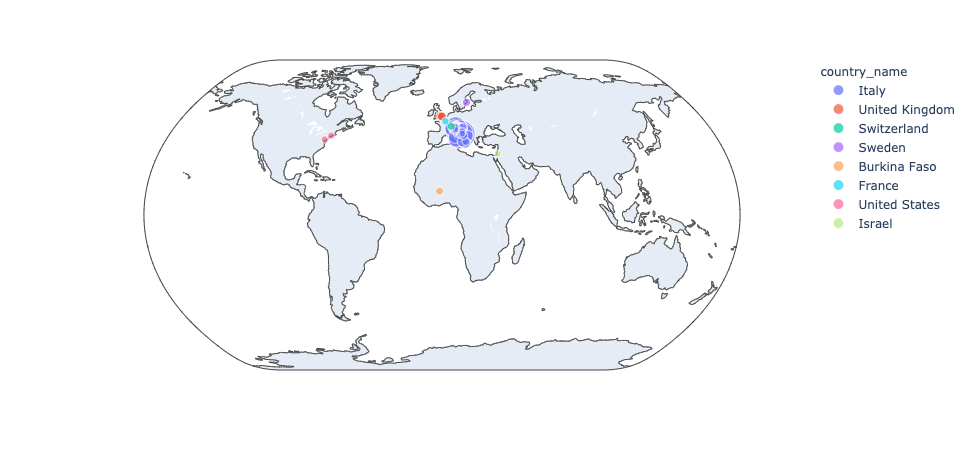

In [10]:
fig = px.scatter_geo(df, lat="latitude", lon="longitude",
                     color="country_name",
                     size="count", 
                     projection="natural earth",
                     hover_name="name",
                     hover_data=['city_name', 'id', 'types']
                     )
fig.show()